In [1]:
import pickle
from os import listdir
from os.path import isdir, isfile, join
from tools import *
from matplotlib.pyplot import figure

import numpy as np
import matplotlib.pyplot as plt

# Basics

In [2]:
# All paths
tables,tables_list = get_all_paths()

In [3]:
mypath = "/home/datasets4/stein/supplements_jena_experiment/Y2021001bis365_csv"
supplements = [mypath + "/" + f for f in listdir(mypath) if isfile(join(mypath, f))]
supplements.sort()

In [4]:
allColumns = list(pd.read_csv(
    "/home/datasets4/stein/jena_experiment/Complete-HeaderFile_extendedBasedOn20173020605_V4.csv", encoding= 'unicode_escape').columns)[:-1]

# First script 

In [5]:
# This is the procedure:
faultyMap  = pickle.load(open("stats/faulty_column_mapping.p", "rb"))
data = load_year(tables[10], faultyMap,allColumns, name = "transform_logs/2004")

Broken load: /home/datasets4/stein/jena_experiment/raw/2013/Y2013D301bis365/BD20133071806.csv
Broken load: /home/datasets4/stein/jena_experiment/raw/2013/Y2013D301bis365/BD20133500823.csv
Broken load: /home/datasets4/stein/jena_experiment/raw/2013/Y2013D301bis365/BD20133541802.csv
load all tables --- 52.64112448692322 seconds ---
Broken tables and faulty table times detected: 3 from 1007
join all tables --- 61.01461434364319 seconds ---
drop Unamed columns --- 61.53645062446594 seconds ---
round to minutes --- 61.541526317596436 seconds ---
Wrong columns found: ['soil_temp_05cm_depth_3A06M[°C]', 'soil_temp_15cm_depth_3A06M[°C]']
Attempt to correct with: ['soil_temp_05cm_depth_3A06N[°C]', 'soil_temp_15cm_depth_3A06N[°C]']
map wrong columns --- 61.54321551322937 seconds ---
Missing columns: []
add missing columns --- 61.5439236164093 seconds ---
Time uplicated dates: 639
2013-02-17 00:04:00    2
2013-04-15 00:06:00    2
2013-02-18 11:59:00    2
2013-03-18 06:09:00    2
2013-04-12 05:59:0

In [6]:
if isinstance(data, pd.DataFrame):
    if not test_columns(data,allColumns):
        print("Column test failed.")
    if not test_length(data):
        print("Length test failed.")
    if not test_year(data):
        print("Year test failed.")    
    print("All tests passed.")

All tests passed.


In [10]:
data2, stats  = threshold_filter(copy.deepcopy(data), which="humidiy", threshold = (-1,101))

In [13]:
data = data[["t[s]"] + [x for x in allColumns if (("soil_temp" in x) or ("air" in x) or ("surface" in x))]]

# Second script

In [19]:
threshold_test = time_sum( pd.read_csv("/home/datasets4/stein/transformed_years/classic/classic_2003.csv") ,sum_minutes= 30)


/home/stein/nextcloud/PHD/transform_code/tools.py:203: RuntimeWarning: Mean of empty slice
  data = np.nanmean(new[:,:,1:].astype("float64"),axis=1)


In [20]:
threshold_test = select_variable_subset(threshold_test, mode ="complete")


In [21]:
threshold_test = cast_to_long_format(threshold_test)

In [45]:
a,b = boxplot_filter(threshold_test, acceptRange=1.5, nPlots=90)

In [49]:
b.loc[(~b["soil_temp_05cm_depth_removed"].isnull()), "soil_temp_05cm_depth"].isnull().sum()

0

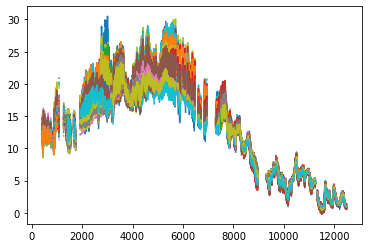

In [23]:
test = a[~(a['datetime'] < "2003-04-15 23:59")].groupby(["plotcode","datetime"]).mean().values
plt.plot(test.reshape([90,-1,2])[:,:,1].T)
plt.show()

# Script 3

In [37]:
data = pd.read_csv("/home/datasets4/stein/sum_years/complete_all.csv")
print(data.isnull().sum())
data = fill_with_mean(data)
print(data.isnull().sum())


datetime                      0
plotcode                      0
soil_temp_15cm_depth    6229253
soil_temp_05cm_depth    6318146
dtype: int64
datetime                   0
plotcode                   0
soil_temp_15cm_depth    4693
soil_temp_05cm_depth     418
dtype: int64


# Compare with old

In [17]:
data = pd.read_csv("/home/datasets4/stein/sum_years/complete_all.csv")
data = data.loc[(data["datetime"] <= "2021-01-05 17:30:00") &  (data["datetime"] >= "2003-02-26 09:00:00")]

In [3]:
old = pd.read_csv("/home/datasets4/stein/30_min_final/complete_soil_temp_30_min_no_filling.csv")

In [45]:
plots = list(set(old["plotcode"]))

In [35]:
for x in plots:
    diff = (data.loc[data["plotcode"] == x[:-1], "soil_temp_05cm_depth"].values) - (old.loc[old["plotcode"] == x, "soil_temp_05cm"].values)

In [40]:
diff[np.abs(diff) > 0.01]

array([-0.0136    ,  0.261     , -0.1395    , -0.14966667,  0.02733333,
       -0.03427536, -0.02519048, -0.02030909, -0.09317143, -0.01934473,
       -0.0592    , -0.12088889, -0.01645963,  0.02053292, -0.22692308,
       -0.341     , -0.0675    ])